#### `import Library`

In [2]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import missingno

####
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn_features.transformers import DataFrameSelector

###sklearn -- metrics
from sklearn.metrics import mean_squared_error

# skleran ---model
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

ImportError: cannot import name 'Series' from 'pandas' (unknown location)

## `Read the dataset`

In [93]:
TRAIN_DATA_PATH = os.path.join(os.getcwd(),"Data.csv")
df = pd.read_csv(TRAIN_DATA_PATH)
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [94]:
df 

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,(UTR),Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,(AJA),Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,(PSV),Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,NaN,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


### `EDA`


In [95]:
###remove the Brackets to club
df["Club"] = df["Club"].str.strip("()")

In [96]:
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,BET,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,BAR,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,ATL,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,CAR,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,VAL,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,UTR,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,Netherlands,Eredivisie,AJA,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,Netherlands,Eredivisie,PSV,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,Netherlands,Eredivisie,NaN,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [97]:
#feature extraction 
df['Minutes_Per_Match'] = df['Mins'] / df['Matches_Played']
df['Shooting_Accuracy'] = df['OnTarget'] / df['Shots']

In [98]:
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Minutes_Per_Match,Shooting_Accuracy
0,Spain,La Liga,BET,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,97.315789,0.416667
1,Spain,La Liga,BAR,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,86.916667,0.465909
2,Spain,La Liga,ATL,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,86.470588,0.475000
3,Spain,La Liga,CAR,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,88.812500,0.358974
4,Spain,La Liga,VAL,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,83.095238,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Netherlands,Eredivisie,UTR,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020,89.791667,0.360000
656,Netherlands,Eredivisie,AJA,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020,87.388889,0.535714
657,Netherlands,Eredivisie,PSV,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020,94.520000,0.311111
658,Netherlands,Eredivisie,NaN,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020,94.653846,0.511905


In [99]:
###check nulls
df.isnull().sum()

Country                     0
League                      0
Club                       34
Player Names                0
Matches_Played              0
Substitution                0
Mins                        0
Goals                       0
xG                          0
xG Per Avg Match            0
Shots                       0
OnTarget                    0
Shots Per Avg Match         0
On Target Per Avg Match     0
Year                        0
Minutes_Per_Match           0
Shooting_Accuracy           0
dtype: int64

In [100]:
##check the duplicate
duplicates = df[df.duplicated()]
duplicates

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Minutes_Per_Match,Shooting_Accuracy


In [101]:
#drop the null value in colum club 
df = df.dropna(subset=["Club"])

In [102]:
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Minutes_Per_Match,Shooting_Accuracy
0,Spain,La Liga,BET,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,97.315789,0.416667
1,Spain,La Liga,BAR,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,86.916667,0.465909
2,Spain,La Liga,ATL,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,86.470588,0.475000
3,Spain,La Liga,CAR,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,88.812500,0.358974
4,Spain,La Liga,VAL,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,83.095238,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,Netherlands,Eredivisie,RZA,Haris Vuckic,23,2,2194,11,6.00,0.26,38,17,1.65,0.74,2020,95.391304,0.447368
655,Netherlands,Eredivisie,UTR,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020,89.791667,0.360000
656,Netherlands,Eredivisie,AJA,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020,87.388889,0.535714
657,Netherlands,Eredivisie,PSV,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020,94.520000,0.311111


In [103]:
##check the duplicate
duplicates = df[df.duplicated()]
duplicates


,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Minutes_Per_Match,Shooting_Accuracy


In [104]:
# Reset the index
df= df.reset_index(drop=True)

In [105]:
df

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Minutes_Per_Match,Shooting_Accuracy
0,Spain,La Liga,BET,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,97.315789,0.416667
1,Spain,La Liga,BAR,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,86.916667,0.465909
2,Spain,La Liga,ATL,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,86.470588,0.475000
3,Spain,La Liga,CAR,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,88.812500,0.358974
4,Spain,La Liga,VAL,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,83.095238,0.460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621,Netherlands,Eredivisie,RZA,Haris Vuckic,23,2,2194,11,6.00,0.26,38,17,1.65,0.74,2020,95.391304,0.447368
622,Netherlands,Eredivisie,UTR,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020,89.791667,0.360000
623,Netherlands,Eredivisie,AJA,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020,87.388889,0.535714
624,Netherlands,Eredivisie,PSV,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020,94.520000,0.311111


In [164]:
df['Player Names'].unique()

array(['Juanmi Callejon', 'Antoine Griezmann', 'Luis Suarez',
       'Ruben Castro', 'Kevin Gameiro', 'Cristiano Ronaldo',
       'Karim Benzema', 'Neymar ', 'Iago Aspas', 'Sergi Enrich',
       'Sandro Ramlrez', 'Lionel Messi', 'Gerard Moreno', 'Morata',
       'Wissam Ben Yedder', 'Willian Jose', 'Andone ', 'Cedric Bakambu',
       'Isco', 'Mohamed Salah', 'Gregoire Defrel', 'Ciro Immobile',
       'Nikola Kalinic', 'Dries Mertens', 'Alejandro Gomez',
       'Jose CallejOn', 'Iago Falque', 'Giovanni Simeone', 'Mauro Icardi',
       'Diego Falcinelli', 'Cyril Thereau', 'Edin Dzeko',
       'Lorenzo Insigne', 'Fabio Quagliarella', 'Borriello ',
       'Carlos Bacca', 'Gonzalo Higuain', 'Keita Balde', 'Andrea Belotti',
       'Fin Bartels', 'Lars Stindl', 'Serge Gnabry', 'Wagner ',
       'Andrej Kramaric', 'Florian Niederlechner', 'Robert Lewandowski',
       'Emil Forsberg', 'Timo Werner', 'Nils Petersen', 'Vedad Ibisevic',
       'Maximilian Philipp', 'A\x81dam Szalai',
       'Pierr

In [107]:
###check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  626 non-null    object 
 1   League                   626 non-null    object 
 2   Club                     626 non-null    object 
 3   Player Names             626 non-null    object 
 4   Matches_Played           626 non-null    int64  
 5   Substitution             626 non-null    int64  
 6   Mins                     626 non-null    int64  
 7   Goals                    626 non-null    int64  
 8   xG                       626 non-null    float64
 9   xG Per Avg Match         626 non-null    float64
 10  Shots                    626 non-null    int64  
 11  OnTarget                 626 non-null    int64  
 12  Shots Per Avg Match      626 non-null    float64
 13  On Target Per Avg Match  626 non-null    float64
 14  Year                     6

In [108]:
##check the null 
df.isnull().sum()

Country                    0
League                     0
Club                       0
Player Names               0
Matches_Played             0
Substitution               0
Mins                       0
Goals                      0
xG                         0
xG Per Avg Match           0
Shots                      0
OnTarget                   0
Shots Per Avg Match        0
On Target Per Avg Match    0
Year                       0
Minutes_Per_Match          0
Shooting_Accuracy          0
dtype: int64

In [109]:
##stats
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Minutes_Per_Match,Shooting_Accuracy
count,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000,626.000000
mean,22.330671,3.138978,2066.292332,11.798722,10.088035,0.476997,64.400958,28.420128,2.963482,1.319696,2018.407348,93.218884,0.448138
std,9.863756,3.792394,910.496713,6.095853,5.814411,0.195333,35.485848,16.655786,0.928117,0.481538,1.357130,11.497362,0.093106
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000,63.111111,0.225000
25%,14.000000,0.000000,1326.250000,8.000000,6.000000,0.340000,37.000000,17.000000,2.340000,0.980000,2017.000000,88.523066,0.388889
50%,24.000000,2.000000,2247.500000,11.000000,9.260000,0.440000,62.000000,26.000000,2.850000,1.250000,2019.000000,92.455844,0.439394
75%,31.000000,5.000000,2829.750000,14.000000,13.242500,0.570000,86.000000,37.000000,3.430000,1.550000,2020.000000,95.836760,0.490731
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000,193.000000,0.916667


In [110]:
#check the unique in colum league 
leaguee = df["League"]
leaguee.unique()

array(['La Liga', 'Serie A', 'Bundesliga', 'Premier League',
       'Campeonato Brasileiro SÃ©rie A', 'France Ligue 11',
       'France Ligue 20', 'France Ligue 2', 'France Ligue 12',
       'France Ligue 9', 'France Ligue 15', 'France Ligue 6',
       'France Ligue 3', 'France Ligue 16', 'France Ligue 14',
       'France Ligue 4', 'France Ligue 1', 'France Ligue 10',
       'France Ligue 7', 'France Ligue 13', 'France Ligue 8',
       'France Ligue 5', 'France Ligue 19', 'France Ligue 18',
       'France Ligue 17', 'MLS', 'Primeira Liga', 'Eredivisie'],
      dtype=object)

In [111]:
##replace the name 'Campeonato Brasileiro SÃ©rie A' to 'Brasileiro league' To not encounter problems during in Deployment
df["League"] = df["League"].replace("Campeonato Brasileiro SÃ©rie A", "Brasileiro league")

In [112]:

leaguee = df["League"]
leaguee.unique()

array(['La Liga', 'Serie A', 'Bundesliga', 'Premier League',
       'Brasileiro league', 'France Ligue 11', 'France Ligue 20',
       'France Ligue 2', 'France Ligue 12', 'France Ligue 9',
       'France Ligue 15', 'France Ligue 6', 'France Ligue 3',
       'France Ligue 16', 'France Ligue 14', 'France Ligue 4',
       'France Ligue 1', 'France Ligue 10', 'France Ligue 7',
       'France Ligue 13', 'France Ligue 8', 'France Ligue 5',
       'France Ligue 19', 'France Ligue 18', 'France Ligue 17', 'MLS',
       'Primeira Liga', 'Eredivisie'], dtype=object)

In [113]:
###target
df["xG"]

0       6.62
1      11.86
2      23.21
3      14.06
4      10.65
       ...  
621     6.00
622     7.49
623     9.77
624     5.72
625     4.43
Name: xG, Length: 626, dtype: float64

In [114]:
#(1)Which players have the highest shooting accuracy?
#(2)Which players have the highest goals-to-matches ?
#(3)Who is the club that scores the most goals?
#(4)What is the country  plays the most matches?
#(5)what is the country with the most goals scored?
#(6)Who are the players who play the most minutes?
#(7)Who are the top scorers in the league?


#### `Data Viz & Handling Outlires`

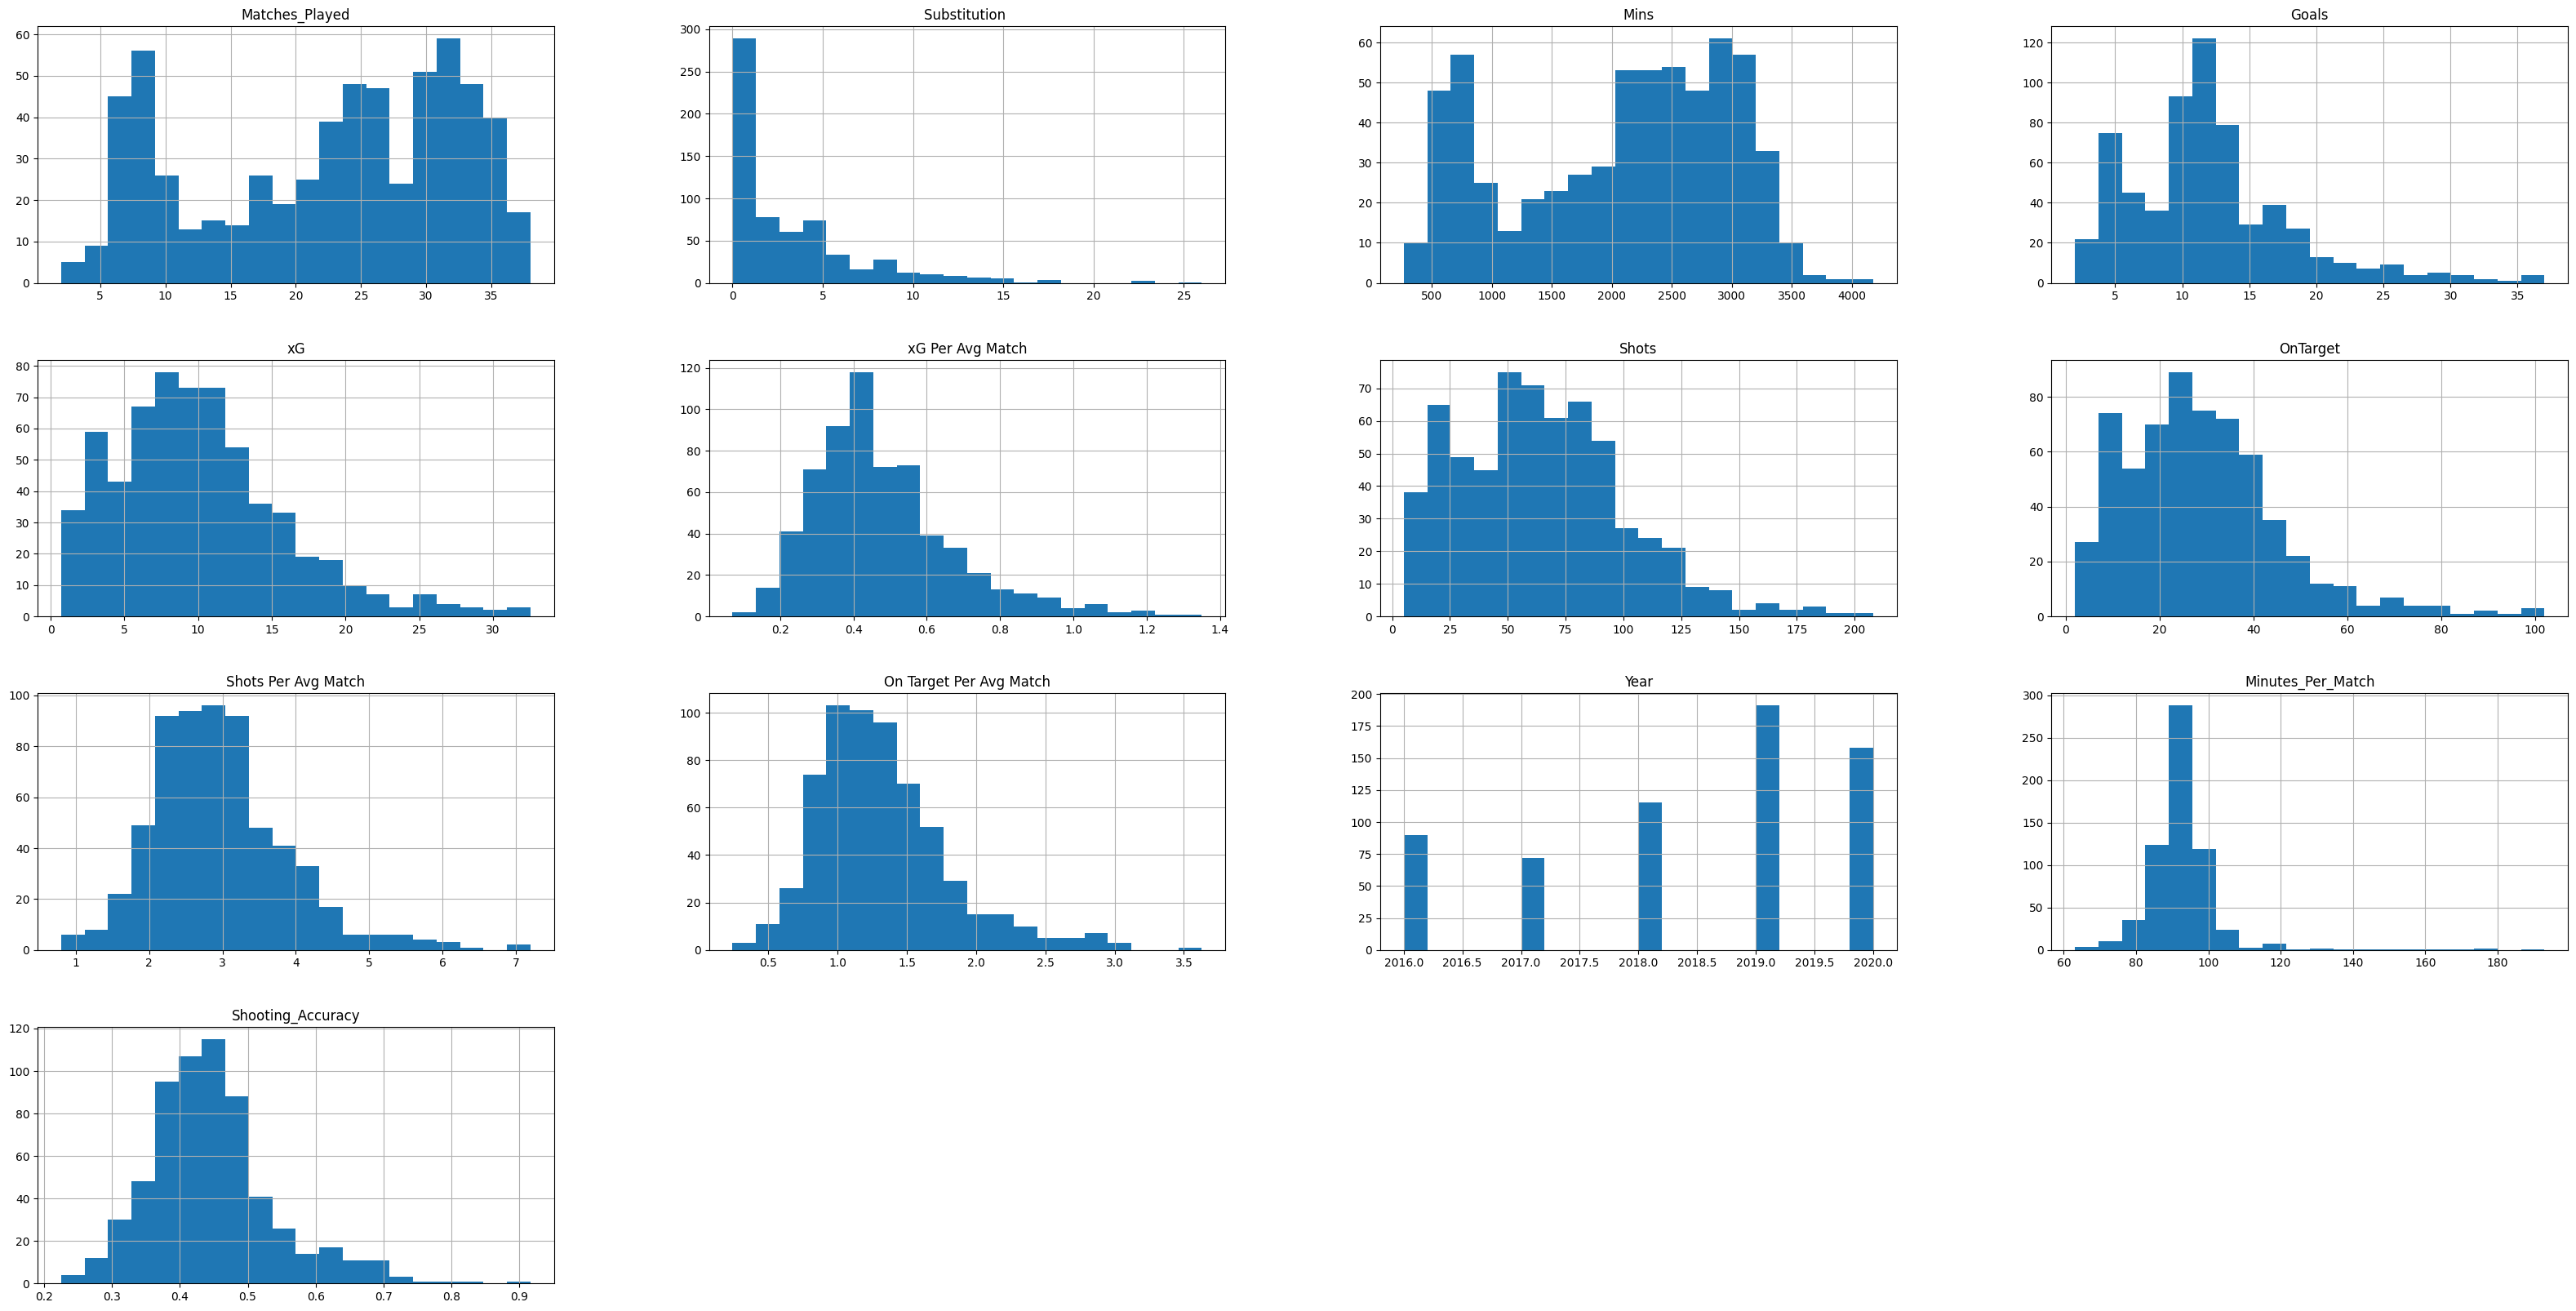

In [115]:
df.hist(bins=20,figsize=(40,20))
plt.show()

In [116]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year,Minutes_Per_Match,Shooting_Accuracy
0,Spain,La Liga,BET,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016,97.315789,0.416667
1,Spain,La Liga,BAR,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016,86.916667,0.465909
2,Spain,La Liga,ATL,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016,86.470588,0.475000
3,Spain,La Liga,CAR,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016,88.812500,0.358974
4,Spain,La Liga,VAL,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016,83.095238,0.460000


In [117]:
# Top 30 players in terms of expected goals scored per match
top_xg=df[["Player Names",'xG Per Avg Match',"Year"]].sort_values(by="xG Per Avg Match", ascending=False).iloc[:30]
top_xg

,Player Names,xG Per Avg Match,Year
526,Zlatan Ibrahimovic,1.35,2020
521,Cristiano Ronaldo,1.27,2020
522,Romelu Lukaku,1.19,2020
231,Kylian Mbappe-Lottin,1.19,2018
101,Cristiano Ronaldo,1.16,2017
129,Robert Lewandowski,1.12,2017
547,Robert Lewandowski,1.10,2020
390,Neymar,1.08,2019
408,Kylian Mbappe-Lottin,1.06,2019
378,Robert Lewandowski,1.06,2019


In [118]:
#This graph describes the players with the highest average expected goals scored per match
fig = px.histogram(top_xg, x="Player Names", y="xG Per Avg Match", color='Year')
fig.show()

In [119]:
## Highest players in terms of shooting accuracy
player_sub = df[["Player Names",'Shooting_Accuracy',"Year"]].sort_values(by="Shooting_Accuracy", ascending=False).iloc[:20]
player_sub

,Player Names,Shooting_Accuracy,Year
551,Kevin Volland,0.916667,2020
51,Adam Szalai,0.833333,2016
494,Esteban Burgos,0.800000,2020
535,Max Kruse,0.769231,2020
40,Lars Stindl,0.735294,2016
21,Ciro Immobile,0.720588,2016
580,Jamie Vardy,0.714286,2020
44,Florian Niederlechner,0.708861,2016
568,James Ward-Prowse,0.700000,2020
35,Carlos Bacca,0.696429,2016


In [120]:
#This graph  shows the top twenty players in terms of shooting accuracy
fig = px.histogram(player_sub, x="Player Names", y="Shooting_Accuracy", color='Year')
fig.show()

In [121]:
#The club with the most goals scored
top_club=df[["Club",'Goals',"Year"]].sort_values(by="Goals", ascending=False).iloc[:12]
top_club

,Club,Goals,Year
11,BAR,37,2016
361,LAZ,36,2019
294,LAF,36,2019
177,BAR,36,2018
378,BAY,34,2019
231,PSG,33,2018
96,BAR,33,2017
279,ACM,31,2019
356,JUV,31,2019
52,ARS,31,2016


In [122]:
#this gragh  shows the top 12 goals-scoring clubs
fig = px.histogram(top_club, x="Club",y="Goals", color='Year')
fig.show()

In [123]:
# The graph shows the number of matches played over the years in each country
fig = px.histogram(df, x="Country", y="Matches_Played")
fig.show()

In [124]:
###The graph shows the number of matches played in Every continent in year (2016,2017,2018,2019,2020)
fig = px.histogram(df, x="Country", y="Matches_Played", color="Year")
fig.show()

In [125]:
##The graph shows The number of goals scored by each continent during a year(2016,2017,2018,2019,2020)
fig = px.histogram(df, x="Country", y="Goals", color="Year")
fig.show()

In [126]:
### Compare Between Lionel Messi and Cristiano Ronaldo Goals
players = df[['Player Names','Goals','Year']][(df['Player Names']=='Cristiano Ronaldo') | (df['Player Names']=='Lionel Messi')]

In [127]:
###The graph shows The number of goals scored by Messi and Ronaldo during a year(2016,2017,2018,2019,2020)
fig = px.histogram(players, x="Player Names", y="Goals", color="Year")
fig.show()

In [128]:
##The graph shows the top '6' player Scoring goals
top_player = df[["Player Names", "Goals", "Year"]].sort_values(by="Goals", ascending=False).iloc[:6]
top_player

,Player Names,Goals,Year
11,Lionel Messi,37,2016
361,Ciro Immobile,36,2019
294,Carlos Vela,36,2019
177,Lionel Messi,36,2018
378,Robert Lewandowski,34,2019
231,Kylian Mbappe-Lottin,33,2018


In [129]:
##The graph shows the top '6' player Scoring goals
fig = px.histogram(top_player, x="Player Names", y="Goals", color="Year")
fig.show()

In [130]:
###top 5 player Mins
top_player_mins =df[["Player Names", "Mins"]].sort_values(by="Mins", ascending=False).iloc[:5]
top_player_mins

,Player Names,Mins
268,Diego Souza,4177
270,Nico Lupez,3931
240,Luka Milivojevic,3651
193,Francesco Caputo,3641
103,Gerard Moreno,3555


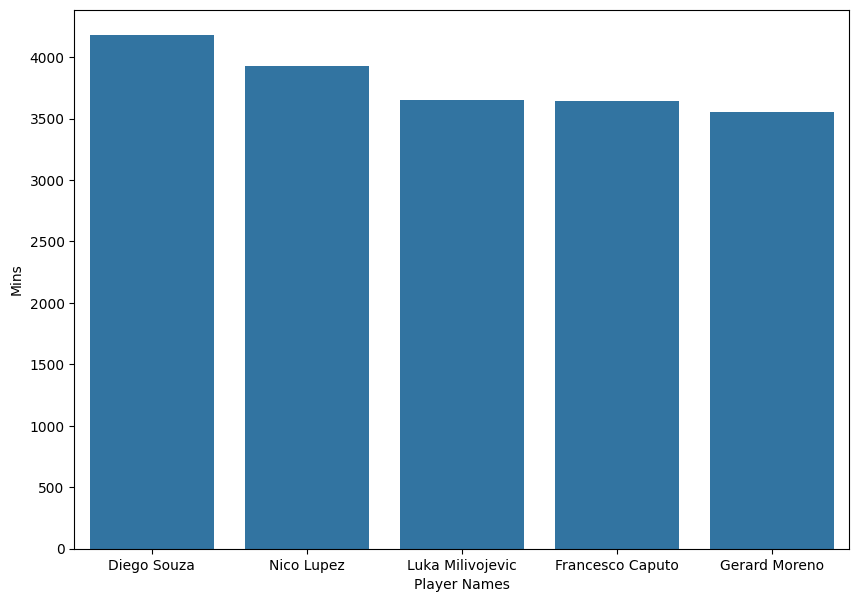

In [131]:
##the graph shows The top 5 players played the highest number of minute
plt.figure(figsize=(10, 7))
sns.barplot(x="Player Names", y="Mins", data=top_player_mins)
plt.show()

In [132]:
#The number of shots each player took during the year
portgual = df[["Player Names", "Shots", "Year"]][df["League"] == "Primeira Liga"]
portgual

,Player Names,Shots,Year
317,Pote,21,2019
318,Eduardo Mancha,5,2019
319,Paulinho,89,2019
320,Bruno Viana,7,2019
321,Mehrdad Mohammadi,56,2019
322,Carlos Valenzuela,10,2019
323,Ruben Lameiras,15,2019
324,Moussa Marega,58,2019
325,Gian-Luca Waldschmidt,15,2019
326,Samuel Lino,16,2019


In [133]:
##This graph describes the number of shots taken by each player in the Portuguese League during the year
fig = px.histogram(portgual, x="Player Names",y="Shots", color="Year")
fig.show()

In [134]:
##Name of the players who scored goals in the German League during the season
germany = df[["Player Names", "Goals", "Year"]][df["League"] == "Bundesliga"]
germany

,Player Names,Goals,Year
39,Fin Bartels,8,2016
40,Lars Stindl,11,2016
41,Serge Gnabry,11,2016
42,Wagner,11,2016
43,Andrej Kramaric,15,2016
...,...,...,...
543,Erling Haaland,10,2020
544,Jhon Cordoba,3,2020
545,Nils Petersen,4,2020
546,Matheus Cunha,6,2020


In [135]:
##The graph contains the names of the players who scored goals in the German League over the years 
fig = px.histogram(germany, x="Player Names", y="Goals", color="Year")
fig.show()

In [136]:
df['League'].unique()

array(['La Liga', 'Serie A', 'Bundesliga', 'Premier League',
       'Brasileiro league', 'France Ligue 11', 'France Ligue 20',
       'France Ligue 2', 'France Ligue 12', 'France Ligue 9',
       'France Ligue 15', 'France Ligue 6', 'France Ligue 3',
       'France Ligue 16', 'France Ligue 14', 'France Ligue 4',
       'France Ligue 1', 'France Ligue 10', 'France Ligue 7',
       'France Ligue 13', 'France Ligue 8', 'France Ligue 5',
       'France Ligue 19', 'France Ligue 18', 'France Ligue 17', 'MLS',
       'Primeira Liga', 'Eredivisie'], dtype=object)

In [137]:
###Number of minutes played by Barcelona players per season
BAR = df[["Player Names", "Mins", "Year"]][df["Club"] == "BAR"]
BAR

,Player Names,Mins,Year
1,Antoine Griezmann,3129,2016
11,Lionel Messi,2910,2016
67,Philippe Coutinho,2327,2016
91,Antoine Griezmann,2596,2017
96,Lionel Messi,3123,2017
114,Mirco Antenucci,2735,2017
175,Antoine Griezmann,3349,2018
177,Lionel Messi,2849,2018
310,Lionel Messi,3067,2019
345,Trincao,1749,2019


In [138]:
# the graph shows Number of minutes played by Barcelona players per season
fig = px.histogram(BAR, x="Player Names", y="Mins", color="Year")
fig.show()

In [139]:
### player in englang score goals
England = df[["Player Names", "Goals", "Year"]][df["Country"] == "England"].sort_values(by="Goals", ascending=False)
England

,Player Names,Goals,Year
60,Harry Kane,29,2016
59,Romelu Lukaku,25,2016
58,Alexis Sanchez,24,2016
413,Jamie Vardy,23,2019
243,Mohamed Salah,22,2018
...,...,...,...
571,Timo Werner,4,2020
582,Neal Maupay,4,2020
584,Sadio Mane,4,2020
585,Riyad Mahrez,4,2020


In [140]:
###the graph shows Every player on the continent of England scored a goal during the season(2016,20)
fig = px.histogram(England, x="Player Names", y="Goals", color="Year")
fig.update_xaxes(tickangle=45)
fig.show()

In [141]:
## We rank the players in the Spanish League from highest in shooting accuracy to lowest
spain_leg = df[["Player Names","Year",'Shooting_Accuracy']][df["League"] =="La Liga"].sort_values(by="Shooting_Accuracy", ascending=False)
spain_leg

,Player Names,Year,Shooting_Accuracy
494,Esteban Burgos,2020,0.800000
489,Portu,2020,0.666667
491,Carlos Soler,2020,0.625000
503,Iago Aspas,2020,0.571429
91,Antoine Griezmann,2017,0.555556
...,...,...,...
99,Willian Josa,2017,0.325843
303,Willian Jose,2019,0.322034
497,Joao Felix,2020,0.285714
488,Youssef En-Nesyri,2020,0.285714


In [142]:
# This graph describesthe players in the Spanish League from highest in shooting accuracy to lowest in the Spanish League over the years 
fig = px.histogram(spain_leg, x="Player Names", y='Shooting_Accuracy', color="Year")
fig.update_xaxes(tickangle=45)
fig.show()

### `Split the dataset`

In [143]:
###split
x = df.drop(columns=["xG"], axis=1)
y = df["xG"]

###split to train and test
x_train , x_test , y_train , y_test =train_test_split( x , y , test_size=0.10,shuffle=True , random_state=42)
x_valid,x_test,y_valid,y_test=train_test_split(x_test,y_test,test_size=0.50,random_state=42)

print("x_train.shape", x_train.shape)
print("y_train.shape", y_train.shape)
print("######"*10)
print("x_test.shape", x_test.shape)
print("y_test.shape", y_test.shape)
print('##############'*10)
print("x_valid.shape", x_valid.shape)
print("y_valid.shape", y_valid.shape)

x_train.shape (563, 16)
y_train.shape (563,)
############################################################
x_test.shape (32, 16)
y_test.shape (32,)
############################################################################################################################################
x_valid.shape (31, 16)
y_valid.shape (31,)


In [144]:
###Numerical : 'Matches_Played', 'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots', 'OnTarget', 'Shots Per Avg Match', 'Year'& imputing (median) & scaling (standrad)
##categorical :''Country', 'Club', 'Player Names'&imputing (mode) & encoding (labelencoding)

num_col=x_train.select_dtypes(include='number').columns.tolist()
categ_col=x_train.select_dtypes(exclude='number').columns.tolist()

print('the numerical colum \t',num_col)
print("the cateogrical colum \t ",categ_col)

the numerical colum 	 ['Matches_Played', 'Substitution ', 'Mins', 'Goals', 'xG Per Avg Match', 'Shots', 'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year', 'Minutes_Per_Match', 'Shooting_Accuracy']
the cateogrical colum 	  ['Country', 'League', 'Club', 'Player Names']


In [156]:
##pipline
num_pipe=Pipeline(steps=[
                    ('selector',DataFrameSelector(num_col)),
                    ('imputer',SimpleImputer(strategy='median')),
                    ('scaler',StandardScaler())
])
categ_pipe = Pipeline(
    steps=[
        ("selector", DataFrameSelector(categ_col)),
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("encoder", OneHotEncoder(handle_unknown='ignore')),
    ]
)
all_pipe=FeatureUnion(transformer_list=[
                   ('categorical',categ_pipe),
                   ('numerical',num_pipe)
])


x_train_final =all_pipe.fit_transform(x_train)
x_test_finall = all_pipe.transform(x_test)

## `Bulding Model`

In [157]:
models={
    'lR':LinearRegression(),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'xgboost':XGBRegressor(),
    'RF':RandomForestRegressor(),
}

In [158]:
for name ,model in models.items():
    print(f'using model :{name}')
    model.fit(x_train_final,y_train)
    print(f"taraining score:{model.score(x_train_final,y_train)}")
    print(f"test score : {model.score (x_test_finall,y_test)}")
    y_pred=model.predict(x_test_finall)
    print(f"mse:{(mean_squared_error(y_test,y_pred))}")
    print('------------------------------------------')

using model :lR
taraining score:0.9882090055260596
test score : 0.8860850023237716
mse:2.7518728996218846
------------------------------------------
using model :SVR
taraining score:0.9078579114519963
test score : 0.9780307207761507
mse:0.5307173362033344
------------------------------------------
using model :DT
taraining score:1.0
test score : 0.868823015659314
mse:3.168875
------------------------------------------
using model :xgboost
taraining score:0.9999380236306227
test score : 0.9596080877121745
mse:0.9757574600027077
------------------------------------------
using model :RF
taraining score:0.9952133883799913
test score : 0.9625548518402117
mse:0.9045717468750025
------------------------------------------


In [159]:
###xgboost
model = XGBRegressor()
model.fit(x_train_final,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [160]:
y_pred=model.predict(x_test_finall)
y_pred

array([10.747917 ,  4.435102 ,  1.6326363,  8.740873 ,  3.4981081,
        4.080703 , 25.246494 , 10.22223  ,  7.367439 ,  5.5980363,
        9.260136 ,  5.862798 , 19.042099 , 13.227736 , 10.086496 ,
        9.00184  , 17.042654 , 16.834694 , 11.063933 ,  3.226238 ,
       13.040999 ,  5.0536256,  7.813051 ,  8.989196 , 11.560786 ,
       15.193781 ,  6.6730633,  3.1032882, 11.947745 ,  2.2099557,
        6.2602406,  8.537405 ], dtype=float32)

In [161]:
y_test

483     9.99
624     5.72
448     1.63
609     9.16
503     4.89
335     3.58
2      23.21
55     11.57
110     6.66
580     8.70
311    11.09
145     6.37
352    18.94
90     11.82
132     9.33
367     9.43
212    16.11
369    16.58
78     10.67
528     3.07
163    12.92
463     4.44
481     8.63
260     9.04
286    11.37
259    15.91
39      6.34
571     3.69
261    12.59
334     2.51
210     6.19
30      9.25
Name: xG, dtype: float64

In [162]:
import joblib

In [163]:
joblib.dump(model,'model_xgboost')

['model_xgboost']